PANDAS TUTORIAL
https://www.w3schools.com/python/pandas/default.asp

In [2]:
# för att importera pandas man vi skriva så där:
import pandas as pd

In [2]:
# för att printa versionen
print(pd.__version__)

# för att sätta nummer av rader
pd.options.display.max_rows = 9999
# för att kolla hur mycket rader kan visas
print(pd.options.display.max_rows) 


1.4.4
9999


In [ ]:
# exempel av snkel tabell
mydataset = {
  'cars': ["BMW", "Volvo", "Ford"],
  'passings': [3, 7, 2]
}

myvar = pd.DataFrame(mydataset)

print(myvar)

SERIES

In [ ]:
# Series
a = [1, 7, 2]
myvar = pd.Series(a)
print(myvar)
print('index = 0:', myvar[0])
print('\n')

# Create Labels
myvar = pd.Series(a, index = ["x", "y", "z"])
print(myvar)
print('index = y:', myvar['y'])
print('\n')

In [52]:
# Key/Value Objects as Series
# Key blir index
calories = {"day1": 420, "day2": 380, "day3": 390}
myvar = pd.Series(calories)
print(myvar)
print('\n')

# för att skapa en serie med precis index från serien
calories = {"day1": 420, "day2": 380, "day3": 390}
myvar = pd.Series(calories, index = ["day1", "day2"])
print(myvar)
print('\n')

day1    420
day2    380
day3    390
dtype: int64


day1    420
day2    380
dtype: int64




DATAFRAME

In [ ]:
# för att skapa en dataframe från 2 serier
# Skapa en diktionär med serier som värd av en nyckel
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}
myvar = pd.DataFrame(data)
print(myvar)
print('\n')

# för att returnera en presis rad man måste använda loc metoden
print(myvar.loc[0])
print('\n')

# för att returnera en list av raderna. Nummer av index måste vara mellan []
print(myvar.loc[[0, 1]])
print('\n')


In [ ]:
# för att skapa en index till dataframe från serier
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}
df = pd.DataFrame(data, index = ['day1', 'day2', 'day3'])
print(df)
print('\n')
print(df["calories"]['day1'])
print('\n')
print(df.loc['day1'])
print('\n')

In [ ]:
# för att ladda till dataframe från en csv filen
df = pd.read_csv('data.csv')
print(df) # eller print(df.to_string())
print('\n')

In [ ]:

# för att ladda till dataframe från en Json
df = pd.read_json('data.js')
#print(df) # eller print(df.to_string())
print('\n')

# för att analizera data i dataframe
print(df.head())        # första 5 rader
print('\n')
print(df.tail())        # sista 5 rader
print('\n')
print(df.info())        # informationer om tabellen

In [30]:
# skapa en dataframe från en diktionär
data = {
  "Duration": {"0":60,  "1":60,  "2":60,  "3":45,  "4":45,  "5":60},
  "Pulse":    {"0":110, "1":117, "2":103, "3":109, "4":117, "5":102},
  "Maxpulse": {"0":130, "1":145, "2":135, "3":175, "4":148, "5":127},
  "Calories": {"0":409, "1":479, "2":340, "3":282, "4":406, "5":300}
}

df = pd.DataFrame(data)

print(df) 
print(df.index)



   Duration  Pulse  Maxpulse  Calories
0        60    110       130       409
1        60    117       145       479
2        60    103       135       340
3        45    109       175       282
4        45    117       148       406
5        60    102       127       300
Index(['0', '1', '2', '3', '4', '5'], dtype='object')


Dålig data kan vara:

    Tomma celler
    Data i fel format
    Fel data
    Dubletter

.dropna()

In [ ]:
df = pd.read_json('data.js')

# för att ta bort alla tomma celler man använder metoden dropna(). Det här sudda alla raderna med tomma celler
# och skapa en ny database.
new_df = df.dropna()
print(df.to_string())
print('\n')
print(new_df.to_string())
print('\n')
# man kan använda det samma metoden med argument inplace = True för att inte skapa en ny database och hantera 
# direkt databasen.
df.dropna(inplace = True)
print(df.to_string())

# om du vill ta bort null värdar i en precis column man kan avända 
df.dropna(subset=['Calories'], inplace = True)

.fillna()

In [ ]:
# om man vill bara ta bort null värdar utan ta bot hela raden man kan använda metoden fillna()
df = pd.read_json('data.js')
df.fillna(' ', inplace = True) 
print(df.to_string())

In [ ]:
# man kan utbyta NULL värdar i celler med fillna metoden
df = pd.read_json('data.js')
df["Calories"].fillna(130, inplace = True) 
print(df.to_string())

Mean, Median, or Mode

In [22]:
df = pd.read_json('data.js')

# Mean (media)
x = df["Calories"].mean()
print('Media', x)
# Mediana
x = df["Calories"].median()
print('Mediana', x)
# Moda
x = df["Calories"].mode()[0]
print('Moda', x)

Media 375.79999999999995
Mediana 318.6
Moda 300.0


Replacing Values

.loc()

In [ ]:
# om man vill utbyta en värd man måste veta coordinaterna i tabellen. För att få det
# kan man använda loc() metoden direkt
df = pd.read_json('data.js')
print(df['Duration'][7])
df.loc[7, 'Duration'] = 50
print(df['Duration'][7])

# det här är ett felt sätt för att utbyta. I pandas finns en precis metod för att utbyta värdar i tabellen.
df['Duration'][7] = 56
print(df['Duration'][7])

In [ ]:
# med index klass attribut kan man få en lista med alla index value
df.index

.drop()

In [ ]:
# för att ta bort en rad man kan använda .drop() metoden
df.drop(x, inplace = True)  # x är radsnummer

In [ ]:
# man kan använda loc för att jamföra värdar i tabellen och göra loppar eller if satser
# exempel
print(df)
print('\n')
for x in df.index:
  if df.loc[x, "Duration"] >= 60:
    df.loc[x, "Duration"] = 120

print(df.to_string())

.duplicate()

In [ ]:
# för att ta bort rader som är lika man kan använda duplicate() metoden
df = pd.read_json('data.js')

# för att visa duplicated rader
print(df.duplicated().to_string())

# för att sudda de
df.drop_duplicates(inplace = True) 
print(df.to_string())


Correlation

.corr()

<AxesSubplot:xlabel='Duration', ylabel='Frequency'>

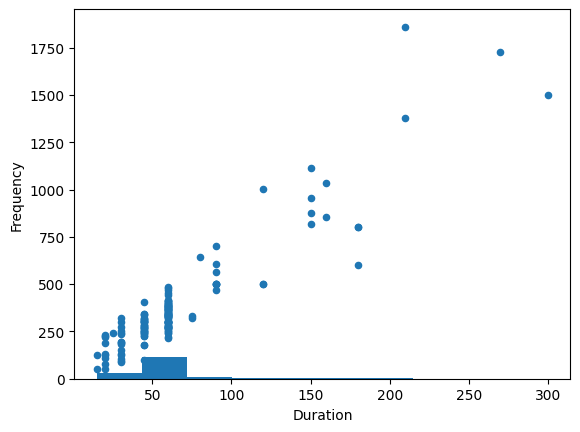

In [51]:
df = pd.read_json('data.js')
df.corr()

# plotting
df.plot(kind = 'scatter', x = 'Duration', y = 'Calories')
df["Duration"].plot(kind = 'hist')
